# Analysis of Water Quality Data

## Step-1: Installing Packages

In [2]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install sklearn

Note: you may need to restart the kernel to use updated packages.


## Step-2: Importing the Packages

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split

## Step-3: Data Acquisition and Basic Data Insights

In [8]:
path="TDSV2.csv"

In [9]:
df=pd.read_csv(path)
df.head()

,S. NO,Temperature,AverageVoltage,CompensatedVoltage,TDSwithoutComp,TDSSensor,Meter-1 (Sachin Sir),Meter-2 (Aftab Sir),TDSMeter,"RO-1(SPCRC ,TDS= 130)",Tap Water(324),RO-2(Himalaya 70),Distilled,Theoritical Value
0,1,50,0.201465,0.134310,81.720090,55.0,81.0,94.0,87.5,NaN,NaN,1.0,0.0,70.0
1,2,48,0.191795,0.131366,77.986266,54.0,91.0,91.0,91.0,NaN,NaN,1.0,0.0,70.0
2,3,45,0.178095,0.127211,72.667605,53.0,92.0,94.0,93.0,NaN,NaN,1.0,0.0,70.0
3,4,42,0.163597,0.122087,67.001390,51.0,87.0,89.0,88.0,NaN,NaN,1.0,0.0,70.0
4,5,40,0.155311,0.119470,63.745103,50.0,88.0,89.0,88.5,NaN,NaN,1.0,0.0,70.0


In [10]:
df.dtypes

S. NO                      int64
Temperature                int64
AverageVoltage           float64
CompensatedVoltage       float64
TDSwithoutComp           float64
TDSSensor                float64
Meter-1 (Sachin Sir)     float64
Meter-2 (Aftab Sir)      float64
TDSMeter                 float64
RO-1(SPCRC ,TDS= 130)    float64
Tap Water(324)           float64
RO-2(Himalaya 70)        float64
Distilled                float64
Theoritical Value        float64
dtype: object

In [11]:
df.describe(include="all")

,S. NO,Temperature,AverageVoltage,CompensatedVoltage,TDSwithoutComp,TDSSensor,Meter-1 (Sachin Sir),Meter-2 (Aftab Sir),TDSMeter,"RO-1(SPCRC ,TDS= 130)",Tap Water(324),RO-2(Himalaya 70),Distilled,Theoritical Value
count,308.000000,308.000000,209.000000,297.000000,2.970000e+02,208.000000,209.000000,210.000000,308.000000,198.000000,132.000000,176.000000,110.000000,308.000000
mean,160.678571,37.545455,979.730574,650.377830,1.926256e+15,105.750000,132.100478,128.619048,88.667208,1.361111,0.895833,1.046875,1.450000,128.738546
std,98.718947,7.925624,14158.609357,11204.951042,3.319649e+16,113.256858,116.094435,108.251999,110.490978,0.904530,0.239357,0.864955,1.383802,89.156105
min,1.000000,25.000000,0.000000,0.000000,0.000000e+00,0.000000,19.000000,12.000000,0.000000,0.000000,0.250000,0.000000,0.000000,3.333333
25%,77.750000,30.000000,0.038681,0.000000,0.000000e+00,12.000000,43.000000,43.000000,0.000000,1.000000,1.000000,0.875000,0.500000,45.000000
50%,154.500000,38.000000,0.220000,0.037735,2.177881e+01,80.500000,95.000000,97.500000,42.750000,1.000000,1.000000,1.000000,1.125000,113.266667
75%,232.250000,45.000000,0.448086,0.275656,1.300826e+02,129.250000,154.000000,142.250000,121.000000,1.750000,1.000000,1.000000,1.750000,201.681818
max,353.000000,50.000000,204689.000000,193102.830200,5.720980e+17,364.000000,461.000000,428.000000,444.500000,3.000000,1.000000,4.000000,5.000000,324.000000


## Step-4: Data Wrangling

In [12]:
df=df.head(32)

In [13]:
df[["Temperature"]]=df[["Temperature"]]/df[["Temperature"]].max()

In [14]:
df.head()

,S. NO,Temperature,AverageVoltage,CompensatedVoltage,TDSwithoutComp,TDSSensor,Meter-1 (Sachin Sir),Meter-2 (Aftab Sir),TDSMeter,"RO-1(SPCRC ,TDS= 130)",Tap Water(324),RO-2(Himalaya 70),Distilled,Theoritical Value
0,1,1.00,0.201465,0.134310,81.720090,55.0,81.0,94.0,87.5,NaN,NaN,1.0,0.0,70.0
1,2,0.96,0.191795,0.131366,77.986266,54.0,91.0,91.0,91.0,NaN,NaN,1.0,0.0,70.0
2,3,0.90,0.178095,0.127211,72.667605,53.0,92.0,94.0,93.0,NaN,NaN,1.0,0.0,70.0
3,4,0.84,0.163597,0.122087,67.001390,51.0,87.0,89.0,88.0,NaN,NaN,1.0,0.0,70.0
4,5,0.80,0.155311,0.119470,63.745103,50.0,88.0,89.0,88.5,NaN,NaN,1.0,0.0,70.0


In [63]:
#Z=df[["Temperature","TDSSensor"]]
Z=df[["TDSSensor"]]


In [64]:
Y=df[["TDSMeter"]]

In [65]:
Z_train, Z_test,Y_train, Y_test= train_test_split(Z,Y,test_size=0.2,random_state=0)
#df1=df.head(11)
#df2=df.tail(11)
#Z_train=df1[["Temperature","AverageVoltage"]]
#Z_test=df2[["Temperature","AverageVoltage"]]
#Y_train=df1[["TDS _Meter"]]
#Y_test=df2[["TDS _Meter"]]

## Step-5: Multiple Linear Regression

In [66]:
lm=LinearRegression()

In [67]:
lm.fit(Z_train,Y_train)

LinearRegression()

In [68]:
Yhat=lm.predict(Z_test)

In [69]:
Yhat

array([[81.64952058],
       [66.54311153],
       [79.13178574],
       [89.20272511],
       [72.83744863],
       [76.6140509 ],
       [53.95443732]])

### Distribution Plot

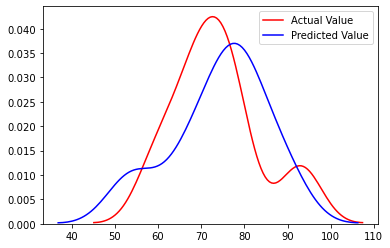

In [70]:
ax1=sns.distplot(Y_test,hist=False,color="r",label="Actual Value")
sns.distplot(Yhat,hist=False,color="b",label="Predicted Value",ax=ax1)


In [71]:
r2_score(Y_test,Yhat)

0.8496341552702822

In [72]:
mse=mean_squared_error(Y_test,Yhat)
mse

14.424380676572211

In [73]:
lm.coef_

array([[1.25886742]])

In [74]:
lm.intercept_

array([22.48275178])

## Step-6: Polynomial  Linear Regression

### A. Degree=2:

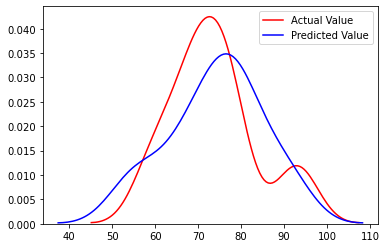

In [75]:
pr=PolynomialFeatures(degree=2,include_bias=False)
X_poly=pr.fit_transform(Z_train)
lm1=LinearRegression()
lm1.fit(X_poly,Y_train)
X_test=pr.fit_transform(Z_test)
Yhat1=lm1.predict(X_test)
ax1=sns.distplot(Y_test,hist=False,color="r",label="Actual Value")
sns.distplot(Yhat1,hist=False,color="b",label="Predicted Value",ax=ax1)


In [76]:
r2_score(Y_test,Yhat1)

0.9057175870571041

In [77]:
lm1.intercept_

array([39.32664283])

In [78]:
lm1.coef_

array([[0.34422389, 0.01169561]])

### B. Degree=3:

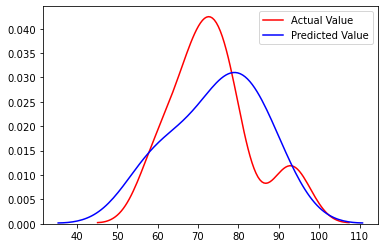

In [79]:
pr=PolynomialFeatures(degree=3,include_bias=False)
X_poly=pr.fit_transform(Z_train)
lm2=LinearRegression()
lm2.fit(X_poly,Y_train)
X_test=pr.fit_transform(Z_test)
Yhat2=lm2.predict(X_test)
ax1=sns.distplot(Y_test,hist=False,color="r",label="Actual Value")
sns.distplot(Yhat2,hist=False,color="b",label="Predicted Value",ax=ax1)


In [80]:
r2_score(Y_test,Yhat2)

0.8507361364525341

In [81]:
lm2.intercept_

array([172.37777099])

In [82]:
lm2.coef_

array([[-1.05833797e+01,  2.99707428e-01, -2.44585700e-03]])

### Degree=4: 

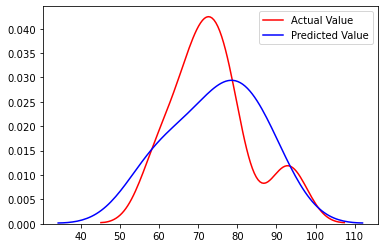

In [83]:
pr=PolynomialFeatures(degree=4,include_bias=False)
X_poly=pr.fit_transform(Z_train)
lm3=LinearRegression()
lm3.fit(X_poly,Y_train)
X_poly=pr.fit_transform(Z_test)
Yhat3=lm3.predict(X_poly)
ax1=sns.distplot(Y_test,hist=False,color="r",label="Actual Value")
sns.distplot(Yhat3,hist=False,color="b",label="Predicted Value",ax=ax1)


In [84]:
r2_score(Y_test,Yhat3)

0.8592998964445527

In [85]:
lm3.intercept_

array([-70.34921442])

In [86]:
lm3.coef_

array([[ 1.60669651e+01, -7.65887612e-01,  1.59699239e-02,
        -1.16328119e-04]])